<a href="https://colab.research.google.com/github/bingxiangch/Trace-BERT/blob/main/T_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-36-32f165a37f48>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted')


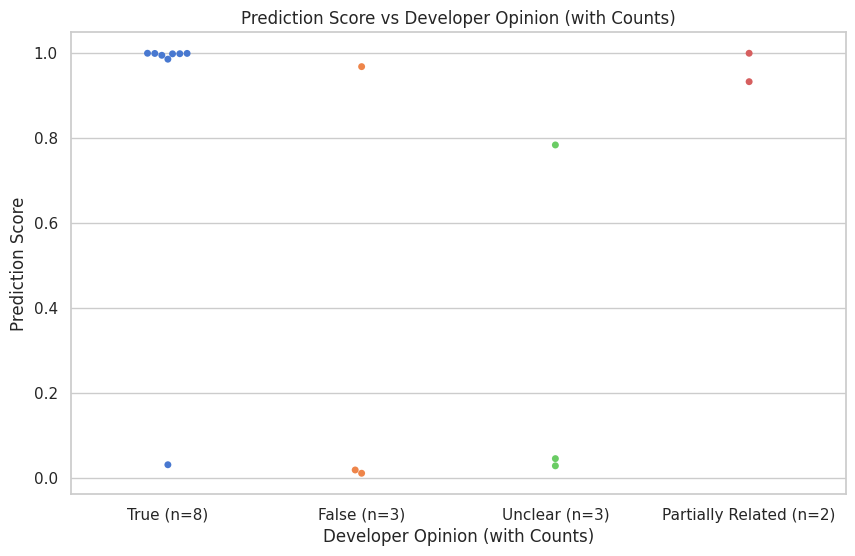

<ipython-input-36-32f165a37f48>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)


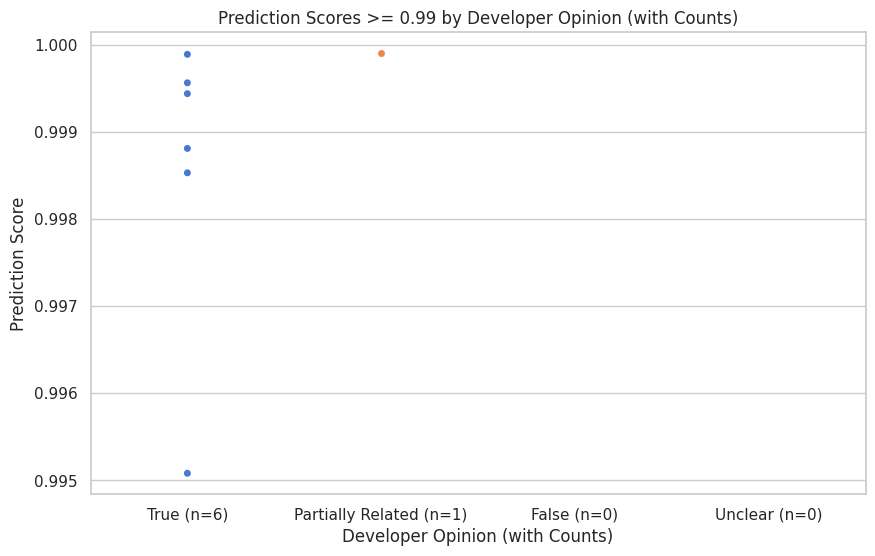

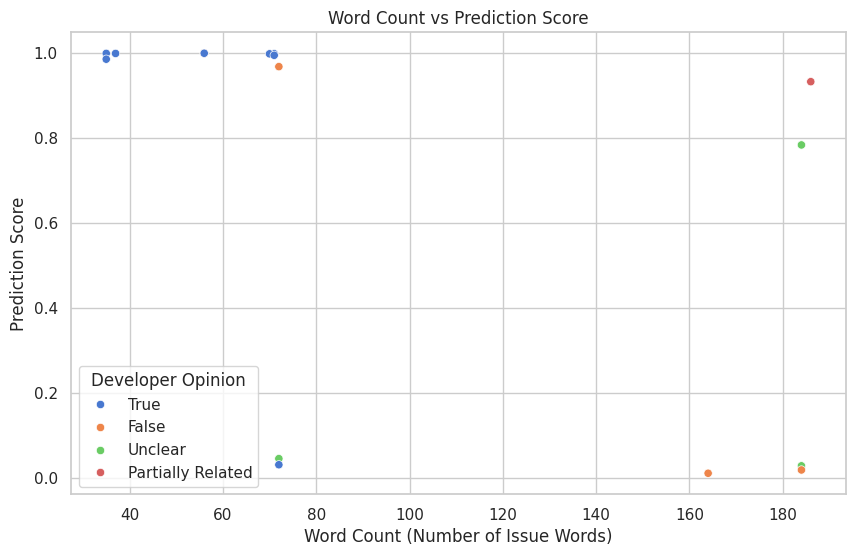

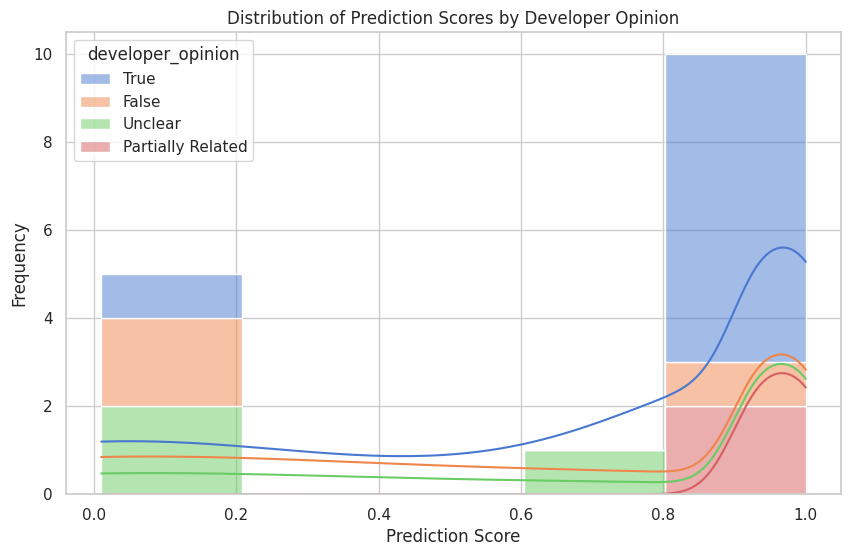

Correlation between word count and prediction score: -0.52

Summary statistics for prediction scores by developer opinion:
                    count      mean       std       min       25%       50%  \
developer_opinion                                                            
True                 8.0  0.875969  0.341658  0.030488  0.992796  0.998671   
False                3.0  0.332333  0.550842  0.010452  0.014312  0.018172   
Unclear              3.0  0.285572  0.431630  0.027922  0.036419  0.044915   
Partially Related    2.0  0.966416  0.047360  0.932927  0.949671  0.966416   

                        75%       max  
developer_opinion                      
True               0.999471  0.999892  
False              0.493273  0.968374  
Unclear            0.414398  0.783880  
Partially Related  0.983160  0.999904  


<ipython-input-36-32f165a37f48>:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()


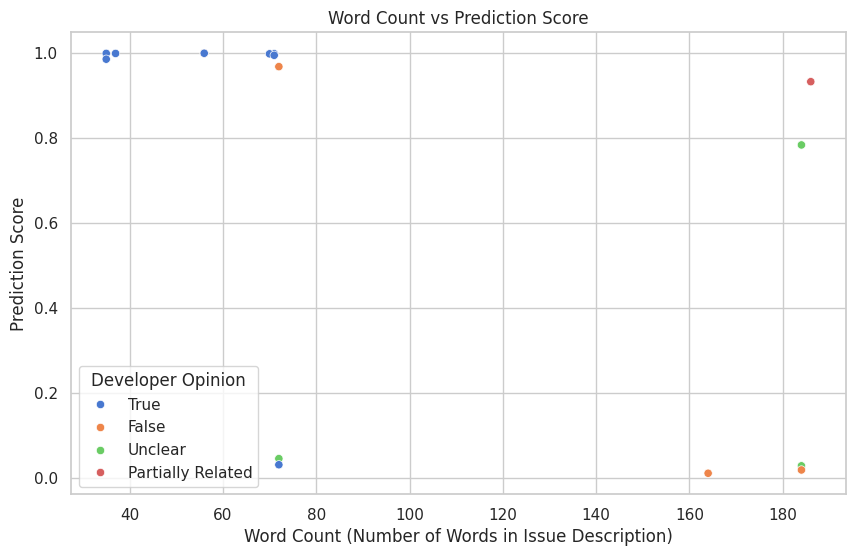


Developer opinion distribution for prediction score >= 0.99:
developer_opinion
True                 6
Partially Related    1
False                0
Unclear              0
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload your Excel file and replace 'your_file.xlsx' with its filename
from google.colab import files

# Load the Excel file into a DataFrame, specify the sheet name
data = pd.read_excel('result.xlsx', sheet_name='LiquidAI-supervisor')

# Ensure the data has the necessary columns
required_columns = ['number_of_issue_words', 'prediction_score', 'developer_opinion']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {required_columns}")

# Use the 'number_of_issue_words' column directly for analysis
data['word_count'] = data['number_of_issue_words']

# Define a mapping for developer opinions to numerical values (e.g., True: 1, False: 0, Unclear: -1)
opinion_mapping = {'True': 1, 'False': 0, 'Unclear': -1, 'Partially Related': 0.5}
data['opinion_mapped'] = data['developer_opinion'].map(opinion_mapping)

# Set up the plots
sns.set(style="whitegrid")

# Plot 1: Swarm plot with counts for developer opinion
plt.figure(figsize=(10, 6))
# Calculate counts for each developer opinion category
opinion_counts = data['developer_opinion'].value_counts()
# Ensure the developer_opinion is treated as a categorical variable (with correct order)
data['developer_opinion'] = pd.Categorical(data['developer_opinion'], categories=opinion_counts.index, ordered=True)
# Create the swarm plot
sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted')

# Manually set the x-axis labels
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)
# Set plot titles and labels
plt.title('Prediction Score vs Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')
# Show the plot
plt.show()



# Plot 2: developer opinion vs prediction score >= 0.99
# Filter the data for entries with a prediction score of 0.99 or higher
filtered_data = data[data['prediction_score'] >= 0.99]

# Calculate counts for each developer opinion in the filtered data
opinion_counts = filtered_data['developer_opinion'].value_counts()

# Create the swarm plot to show trends
plt.figure(figsize=(10, 6))
sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)

# Update x-axis labels to include counts (ensure the order matches the plot)
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)

# Set plot titles and labels
plt.title('Prediction Scores >= 0.99 by Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')

# Show the plot
plt.show()

filtered_data = data[data['prediction_score'] >= 0.99]

# Developer Opinion distribution
filtered_opinion_counts = filtered_data['developer_opinion'].value_counts()

print(f"\nDeveloper opinion distribution for prediction score >= 0.99:\n{filtered_opinion_counts}")



# Plot 3: Word count vs Prediction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=data, palette='muted')
plt.title('Word Count vs Prediction Score')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()



# Plot 4: Distribution of Prediction Scores for True/False/Unclear
plt.figure(figsize=(10, 6))
sns.histplot(data, x='prediction_score', hue='developer_opinion', kde=True, multiple='stack', palette='muted')
plt.title('Distribution of Prediction Scores by Developer Opinion')
plt.xlabel('Prediction Score')
plt.ylabel('Frequency')
plt.show()

# Analysis:

# 1. Correlation between Word Count and Prediction Score
# Calculate the correlation between word count and prediction score
correlation = data['word_count'].corr(data['prediction_score'])
print(f"Correlation between word count and prediction score: {correlation:.2f}")
# Interpretation: If the correlation is negative, it indicates that fewer words are generally associated with higher prediction scores.

# 2. Summary Statistics by Developer Opinion
# Group by 'developer_opinion' and calculate summary statistics for prediction scores
summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()
print("\nSummary statistics for prediction scores by developer opinion:\n", summary_stats)




Saving result.xlsx to result.xlsx


<ipython-input-28-1ae90c9a5761>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted')


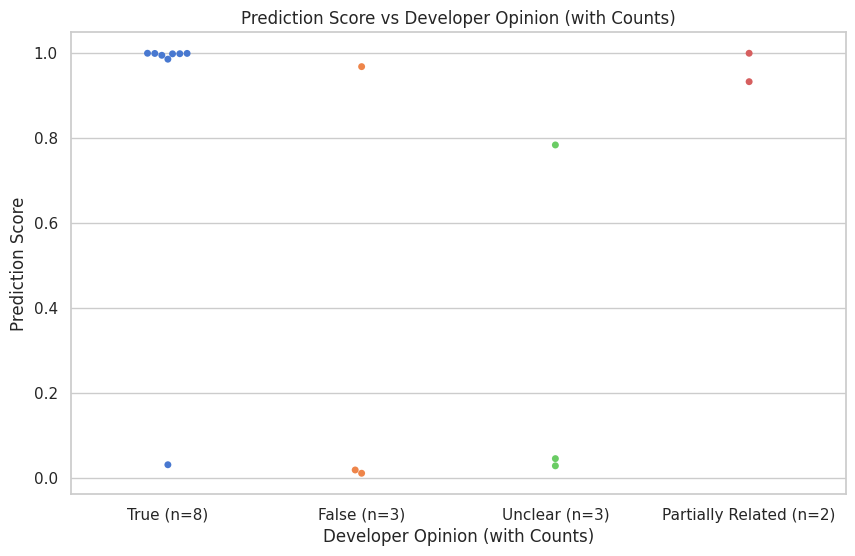

<ipython-input-28-1ae90c9a5761>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)


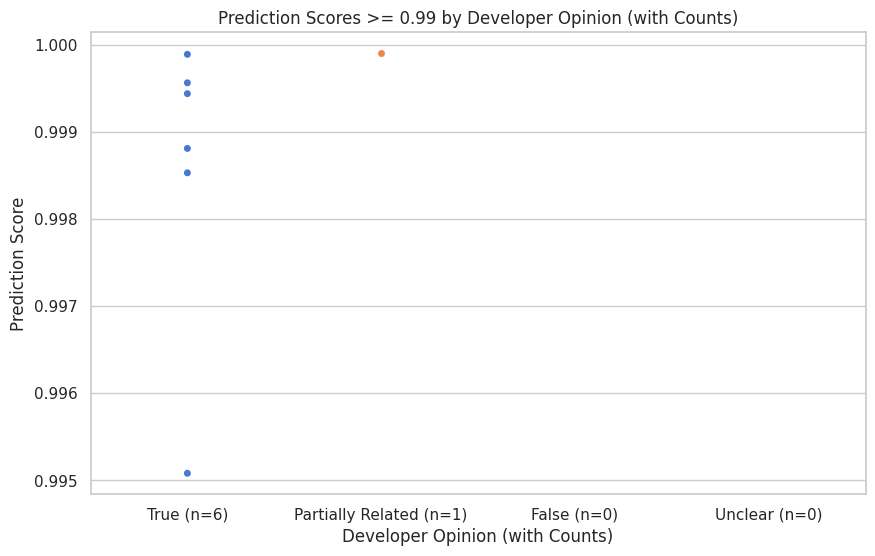

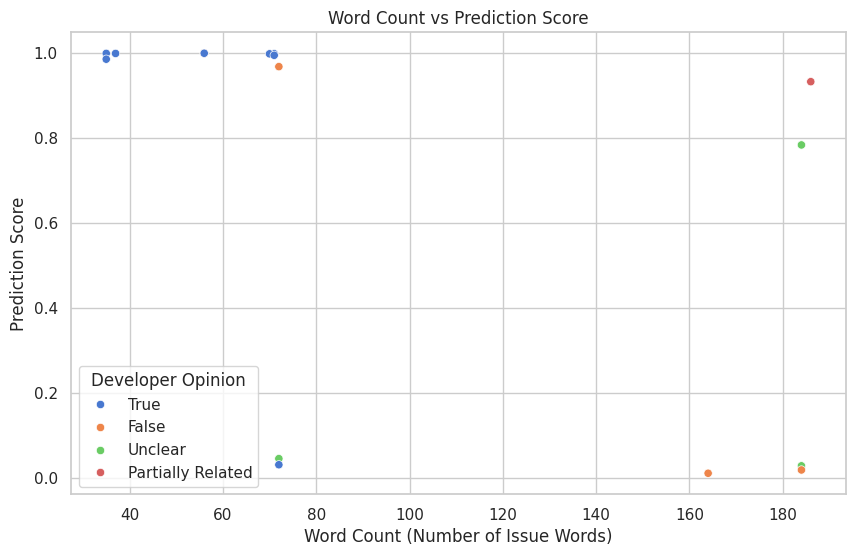

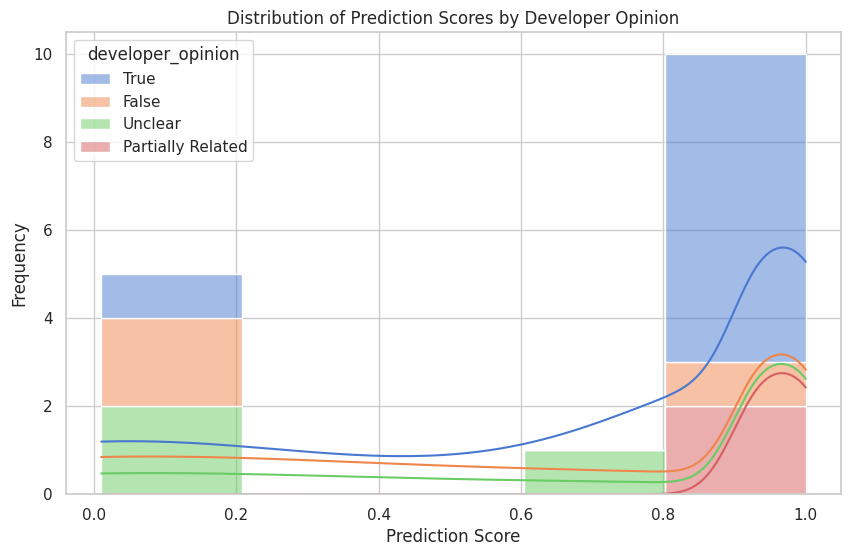

Correlation between word count and prediction score: -0.52
Summary statistics for prediction scores by developer opinion:
                    count      mean       std       min       25%       50%  \
developer_opinion                                                            
True                 8.0  0.875969  0.341658  0.030488  0.992796  0.998671   
False                3.0  0.332333  0.550842  0.010452  0.014312  0.018172   
Unclear              3.0  0.285572  0.431630  0.027922  0.036419  0.044915   
Partially Related    2.0  0.966416  0.047360  0.932927  0.949671  0.966416   

                        75%       max  
developer_opinion                      
True               0.999471  0.999892  
False              0.493273  0.968374  
Unclear            0.414398  0.783880  
Partially Related  0.983160  0.999904  


<ipython-input-28-1ae90c9a5761>:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload your Excel file and replace 'your_file.xlsx' with its filename
from google.colab import files
uploaded = files.upload()

# Load the Excel file into a DataFrame, specify the sheet name
data = pd.read_excel(next(iter(uploaded.keys())), sheet_name='LiquidAI-supervisor')

# Ensure the data has the necessary columns
required_columns = ['number_of_issue_words', 'prediction_score', 'developer_opinion']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {required_columns}")

# Use the 'number_of_issue_words' column directly for analysis
data['word_count'] = data['number_of_issue_words']

# Define a mapping for developer opinions to numerical values (e.g., True: 1, False: 0, Unclear: -1)
opinion_mapping = {'True': 1, 'False': 0, 'Unclear': -1, 'Partially Related': 0.5}
data['opinion_mapped'] = data['developer_opinion'].map(opinion_mapping)

# Set up the plots
sns.set(style="whitegrid")


# Plot 1: Swarm plot with counts for developer opinion
plt.figure(figsize=(10, 6))
# Calculate counts for each developer opinion category
opinion_counts = data['developer_opinion'].value_counts()
# Ensure the developer_opinion is treated as a categorical variable (with correct order)
data['developer_opinion'] = pd.Categorical(data['developer_opinion'], categories=opinion_counts.index, ordered=True)
# Create the swarm plot
sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted')

# Manually set the x-axis labels
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)
# Set plot titles and labels
plt.title('Prediction Score vs Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')
# Show the plot
plt.show()



# Plot 2: developer opinion vs prediction score >= 0.99
# Filter the data for entries with a prediction score of 0.99 or higher
filtered_data = data[data['prediction_score'] >= 0.99]

# Calculate counts for each developer opinion in the filtered data
opinion_counts = filtered_data['developer_opinion'].value_counts()

# Create the swarm plot to show trends
plt.figure(figsize=(10, 6))
sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)

# Update x-axis labels to include counts (ensure the order matches the plot)
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)

# Set plot titles and labels
plt.title('Prediction Scores >= 0.99 by Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')

# Show the plot
plt.show()




# Plot 3: Word count vs Prediction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=data, palette='muted')
plt.title('Word Count vs Prediction Score')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()



# Plot 4: Distribution of Prediction Scores for True/False/Unclear
plt.figure(figsize=(10, 6))
sns.histplot(data, x='prediction_score', hue='developer_opinion', kde=True, multiple='stack', palette='muted')
plt.title('Distribution of Prediction Scores by Developer Opinion')
plt.xlabel('Prediction Score')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# Calculate correlation between word count and prediction score
correlation = data['word_count'].corr(data['prediction_score'])
print(f"Correlation between word count and prediction score: {correlation:.2f}")

# Show summary statistics for prediction scores by developer opinion
summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()
print("Summary statistics for prediction scores by developer opinion:\n", summary_stats)

<ipython-input-39-00f92bc14fd3>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted')


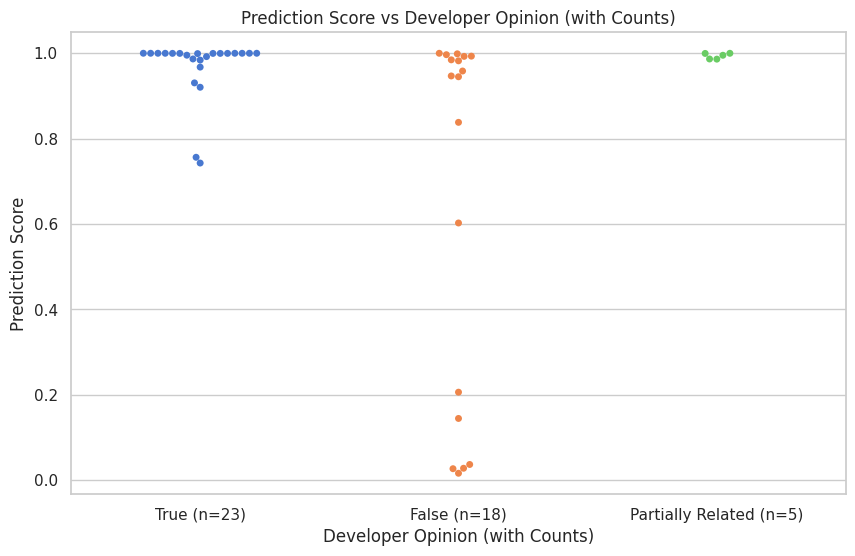

<ipython-input-39-00f92bc14fd3>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)


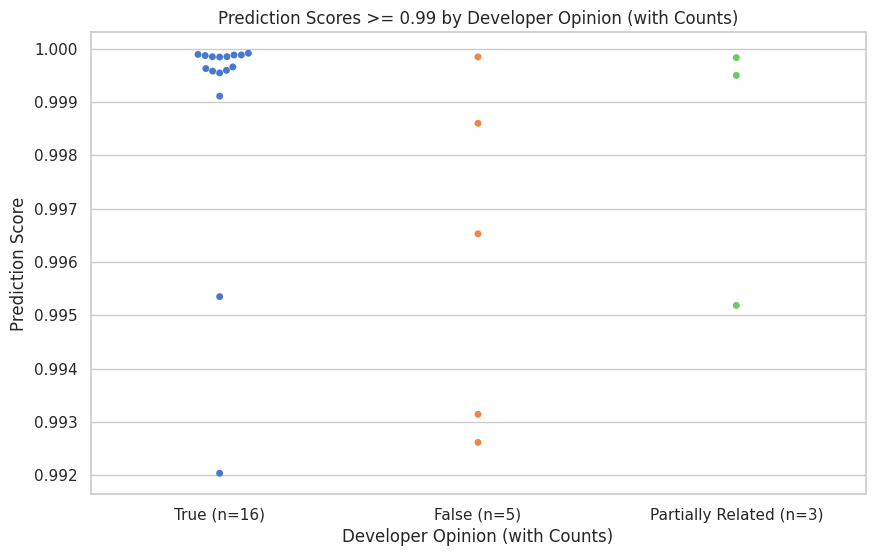

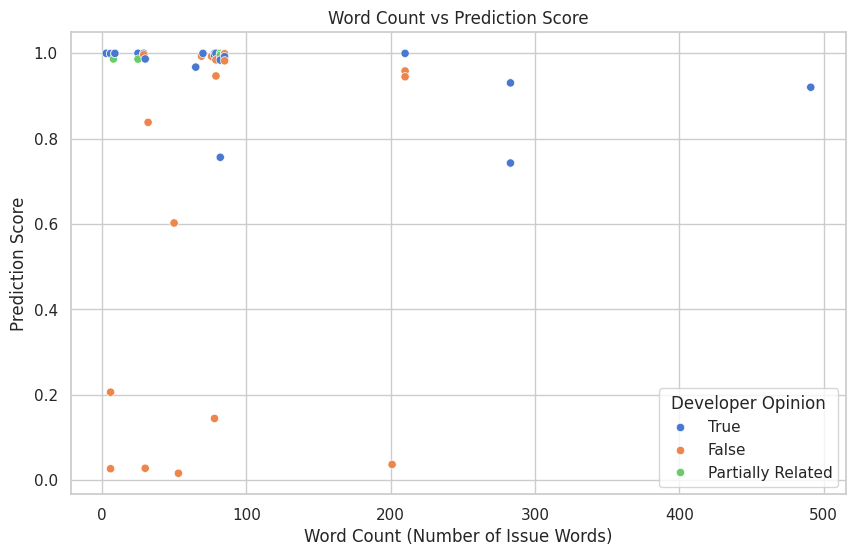

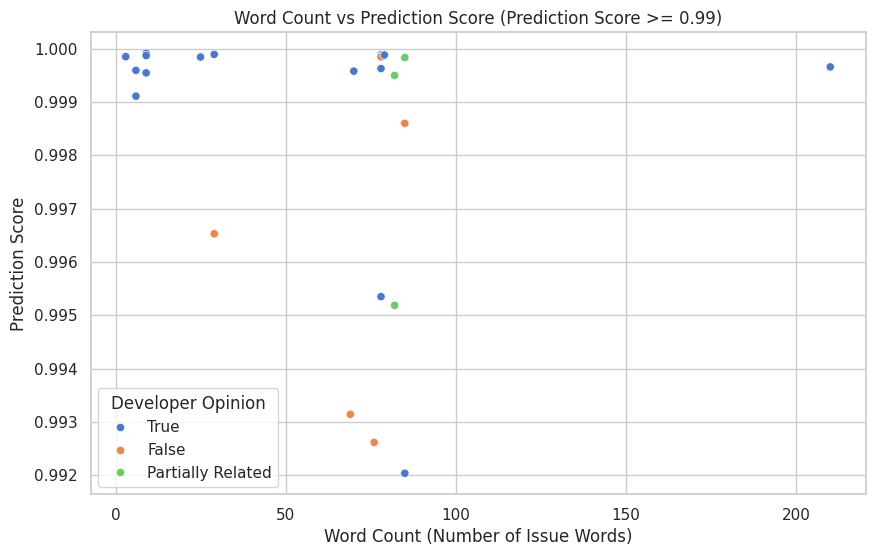

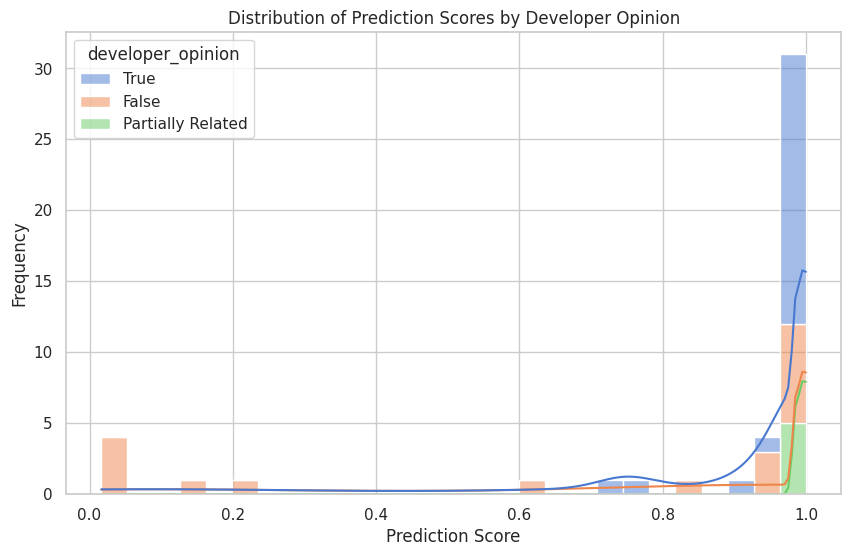

Correlation between word count and prediction score: 0.03
Summary statistics for prediction scores by developer opinion:
                    count      mean       std       min       25%       50%  \
developer_opinion                                                            
True                23.0  0.968324  0.072355  0.742856  0.985252  0.999577   
False               18.0  0.649891  0.429277  0.016506  0.160196  0.945803   
Partially Related    5.0  0.993430  0.006746  0.986137  0.986501  0.995185   

                        75%       max  
developer_opinion                      
True               0.999847  0.999912  
False              0.990586  0.999844  
Partially Related  0.999497  0.999830  


<ipython-input-39-00f92bc14fd3>:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload your Excel file and replace 'your_file.xlsx' with its filename
from google.colab import files

# Load the Excel file into a DataFrame, specify the sheet name
data = pd.read_excel('result.xlsx', sheet_name='intelligent-machine-engine')

# Ensure the data has the necessary columns
required_columns = ['number_of_issue_words', 'prediction_score', 'developer_opinion']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {required_columns}")

# Use the 'number_of_issue_words' column directly for analysis
data['word_count'] = data['number_of_issue_words']

# Define a mapping for developer opinions to numerical values (e.g., True: 1, False: 0, Unclear: -1)
opinion_mapping = {'True': 1, 'False': 0, 'Unclear': -1, 'Partially Related': 0.5}
data['opinion_mapped'] = data['developer_opinion'].map(opinion_mapping)

# Set up the plots
sns.set(style="whitegrid")

# Plot 1: Swarm plot with counts for developer opinion
plt.figure(figsize=(10, 6))
# Calculate counts for each developer opinion category
opinion_counts = data['developer_opinion'].value_counts()
# Ensure the developer_opinion is treated as a categorical variable (with correct order)
data['developer_opinion'] = pd.Categorical(data['developer_opinion'], categories=opinion_counts.index, ordered=True)
# Create the swarm plot
sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted')

# Manually set the x-axis labels
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)
# Set plot titles and labels
plt.title('Prediction Score vs Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')
# Show the plot
plt.show()





# Plot 2: developer opinion vs prediction score >= 0.99
# Filter the data for entries with a prediction score of 0.99 or higher
filtered_data = data[data['prediction_score'] >= 0.99]

# Calculate counts for each developer opinion in the filtered data
opinion_counts = filtered_data['developer_opinion'].value_counts()

# Create the swarm plot to show trends
plt.figure(figsize=(10, 6))
sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)

# Update x-axis labels to include counts (ensure the order matches the plot)
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)

# Set plot titles and labels
plt.title('Prediction Scores >= 0.99 by Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')

# Show the plot
plt.show()




# Plot 3: Word count vs Prediction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=data, palette='muted')
plt.title('Word Count vs Prediction Score')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()



# Filter data where prediction score >= 0.99
high_prediction_data = data[data['prediction_score'] >= 0.99]

# Plot 4: Word count vs Prediction Score (For Prediction Score >= 0.99)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=high_prediction_data, palette='muted')
plt.title('Word Count vs Prediction Score (Prediction Score >= 0.99)')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()

# Plot 4: Distribution of Prediction Scores for True/False/Unclear
plt.figure(figsize=(10, 6))
sns.histplot(data, x='prediction_score', hue='developer_opinion', kde=True, multiple='stack', palette='muted')
plt.title('Distribution of Prediction Scores by Developer Opinion')
plt.xlabel('Prediction Score')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# Calculate correlation between word count and prediction score
correlation = data['word_count'].corr(data['prediction_score'])
print(f"Correlation between word count and prediction score: {correlation:.2f}")

# Show summary statistics for prediction scores by developer opinion
summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()
print("Summary statistics for prediction scores by developer opinion:\n", summary_stats)


<ipython-input-49-f8cedafe04a0>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted')


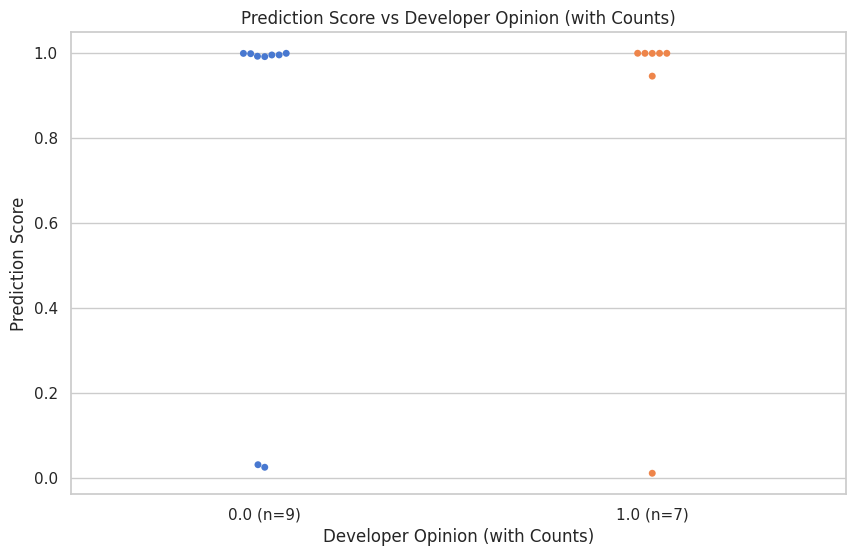

<ipython-input-49-f8cedafe04a0>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)


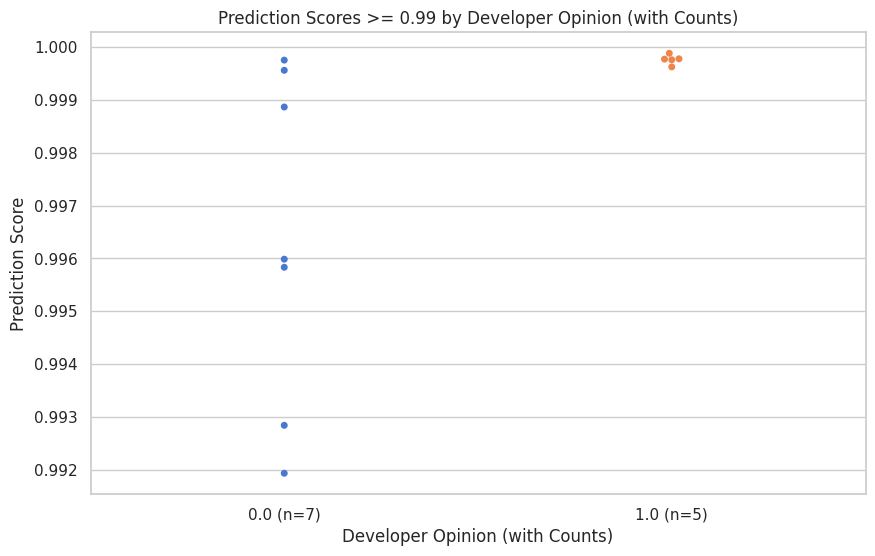

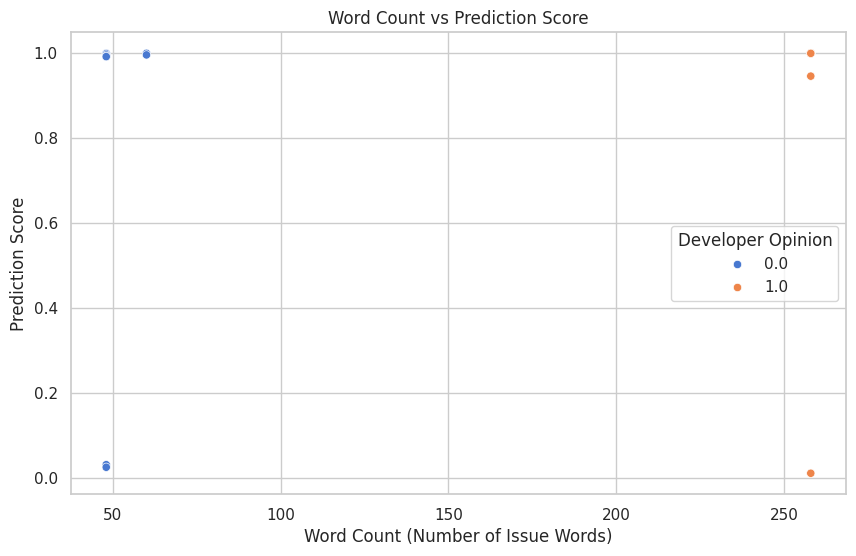

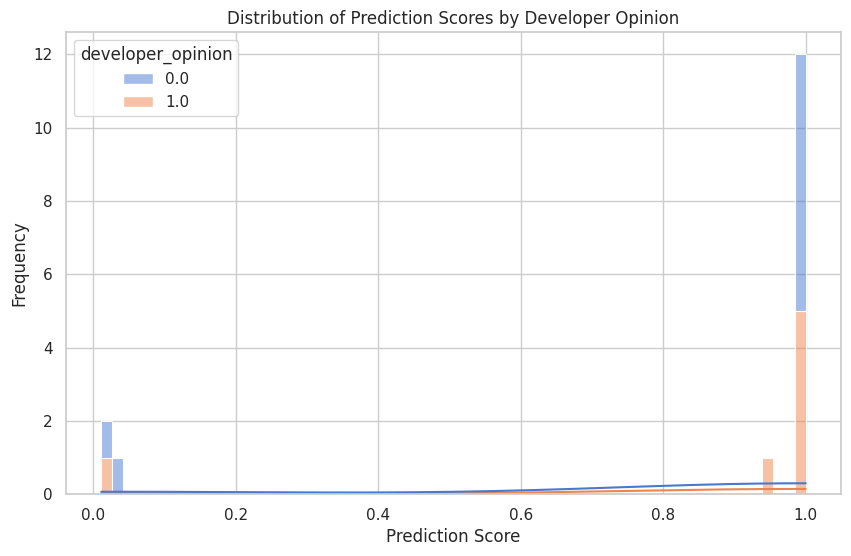

Correlation between word count and prediction score: 0.10
Summary statistics for prediction scores by developer opinion:
                    count      mean       std       min       25%       50%  \
developer_opinion                                                            
0.0                  9.0  0.781244  0.426941  0.025214  0.991938  0.995833   
1.0                  7.0  0.850847  0.370833  0.011103  0.972822  0.999757   

                        75%      max  
developer_opinion                     
0.0                0.998863  0.99975  
1.0                0.999772  0.99988  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload your Excel file and replace 'your_file.xlsx' with its filename
from google.colab import files

# Load the Excel file into a DataFrame, specify the sheet name
data = pd.read_excel('result.xlsx', sheet_name='EVCommunities')

# Ensure the data has the necessary columns
required_columns = ['number_of_issue_words', 'prediction_score', 'developer_opinion']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {required_columns}")

# Use the 'number_of_issue_words' column directly for analysis
data['word_count'] = data['number_of_issue_words']

# Define a mapping for developer opinions to numerical values (e.g., True: 1, False: 0, Unclear: -1)
opinion_mapping = {'True': 1, 'False': 0, 'Unclear': -1, 'Partially Related': 0.5}
data['opinion_mapped'] = data['developer_opinion'].map(opinion_mapping)


# Set up the plots
sns.set(style="whitegrid")

# Plot 1: Swarm plot with counts for developer opinion
plt.figure(figsize=(10, 6))
# Calculate counts for each developer opinion category
opinion_counts = data['developer_opinion'].value_counts()

# Create the swarm plot using developer_opinion directly
sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted')

# Manually set the x-axis labels to show the count of each developer opinion
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)

# Set plot titles and labels
plt.title('Prediction Score vs Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')

# Show the plot
plt.show()




# Plot 2: developer opinion vs prediction score >= 0.99
# Filter the data for entries with a prediction score of 0.99 or higher
filtered_data = data[data['prediction_score'] >= 0.99]

# Calculate counts for each developer opinion in the filtered data
opinion_counts = filtered_data['developer_opinion'].value_counts()

# Create the swarm plot to show trends
plt.figure(figsize=(10, 6))
sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)

# Update x-axis labels to include counts (ensure the order matches the plot)
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)

# Set plot titles and labels
plt.title('Prediction Scores >= 0.99 by Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')

# Show the plot
plt.show()




# Plot 3: Word count vs Prediction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=data, palette='muted')
plt.title('Word Count vs Prediction Score')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()

# Filter data where prediction score >= 0.99
high_prediction_data = data[data['prediction_score'] >= 0.99]


# Plot 4: Distribution of Prediction Scores for True/False/Unclear
plt.figure(figsize=(10, 6))
sns.histplot(data, x='prediction_score', hue='developer_opinion', kde=True, multiple='stack', palette='muted')
plt.title('Distribution of Prediction Scores by Developer Opinion')
plt.xlabel('Prediction Score')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# Calculate correlation between word count and prediction score
correlation = data['word_count'].corr(data['prediction_score'])
print(f"Correlation between word count and prediction score: {correlation:.2f}")

# Show summary statistics for prediction scores by developer opinion
summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()
print("Summary statistics for prediction scores by developer opinion:\n", summary_stats)


<ipython-input-40-daba42e1529b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted', order=opinion_counts.index)


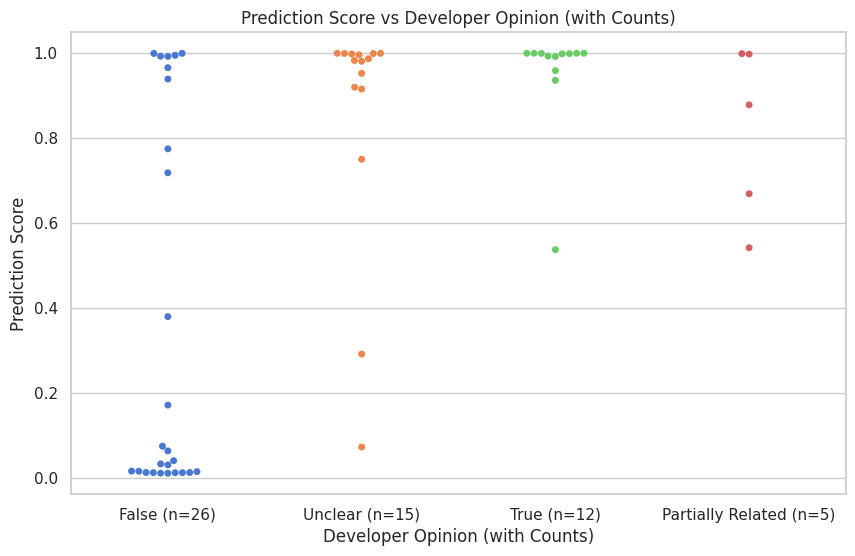

<ipython-input-40-daba42e1529b>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)


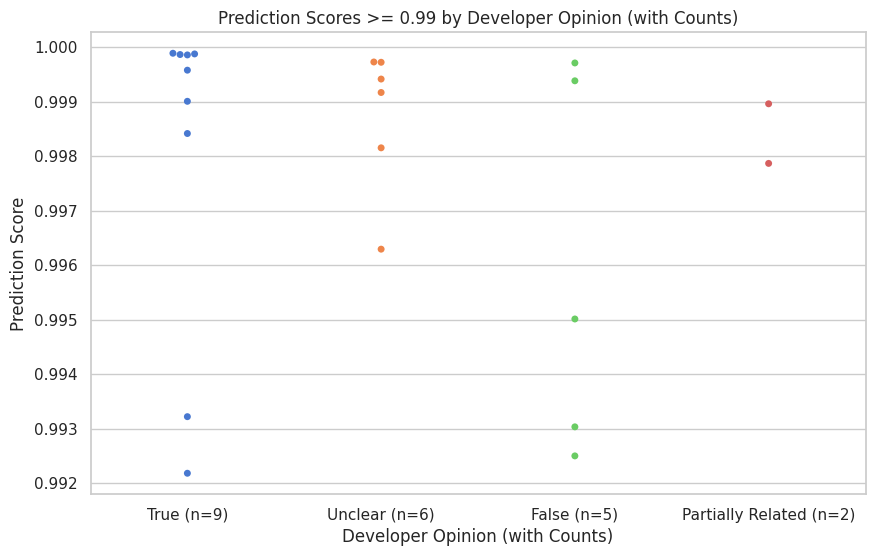

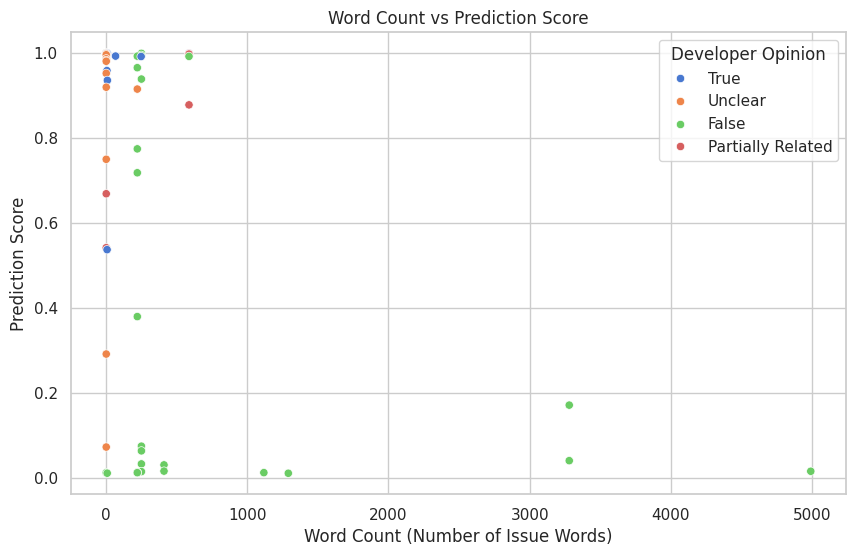

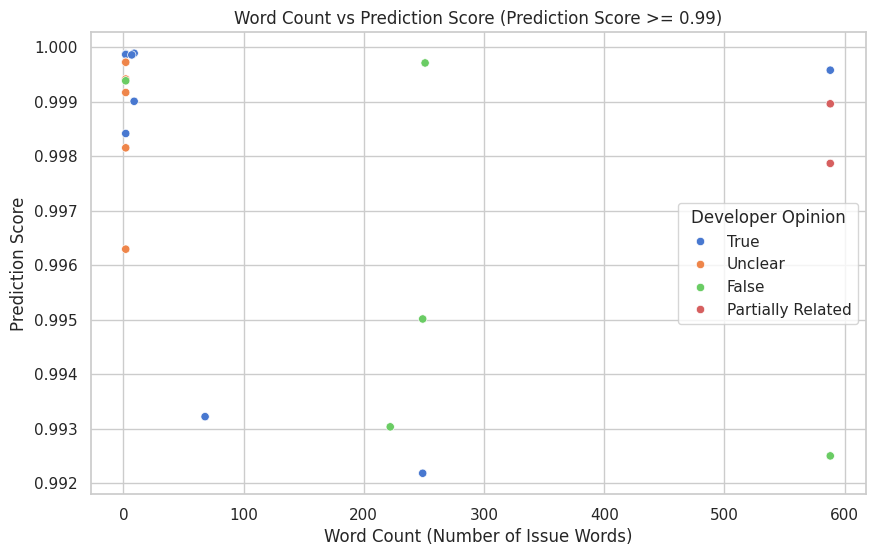

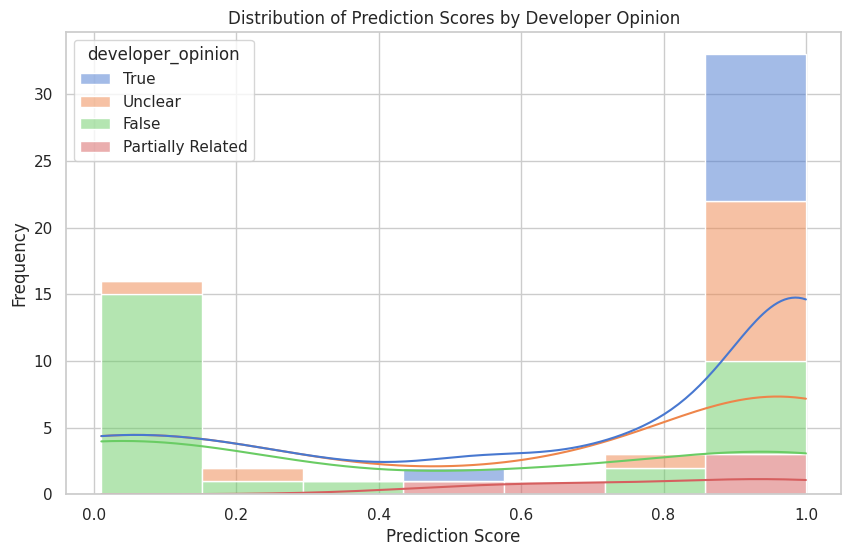

Correlation between word count and prediction score: -0.39
Summary statistics for prediction scores by developer opinion:
                    count      mean       std       min       25%       50%  \
developer_opinion                                                            
False               26.0  0.357475  0.436150  0.010472  0.012707  0.051670   
True                12.0  0.951172  0.131941  0.537165  0.983881  0.998712   
Partially Related    5.0  0.817167  0.204478  0.541786  0.668935  0.878285   
Unclear             15.0  0.856329  0.284417  0.072207  0.917711  0.982945   

                        75%       max  
developer_opinion                      
False              0.897981  0.999711  
True               0.999861  0.999889  
Partially Related  0.997868  0.998962  
Unclear            0.998661  0.999729  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload your Excel file and replace 'your_file.xlsx' with its filename
from google.colab import files

# Load the Excel file into a DataFrame, specify the sheet name
data = pd.read_excel('result.xlsx', sheet_name='AI-agent')

# Ensure the data has the necessary columns
required_columns = ['number_of_issue_words', 'prediction_score', 'developer_opinion']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {required_columns}")

# Use the 'number_of_issue_words' column directly for analysis
data['word_count'] = data['number_of_issue_words']

# Define a mapping for developer opinions to numerical values (e.g., True: 1, False: 0, Unclear: -1)
opinion_mapping = {'True': 1, 'False': 0, 'Unclear': -1, 'Partially Related': 0.5}
data['opinion_mapped'] = data['developer_opinion'].map(opinion_mapping)

# Set up the plots
sns.set(style="whitegrid")
# Plot 1: Swarm plot with counts for developer opinion
plt.figure(figsize=(10, 6))
# Calculate counts for each developer opinion category
opinion_counts = data['developer_opinion'].value_counts()
# Create the swarm plot
sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted', order=opinion_counts.index)
# Update x-axis labels to include counts (ensure the order matches the plot)
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)
# Set plot titles and labels
plt.title('Prediction Score vs Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')
# Show the plot
plt.show()

# Plot 2: developer opinion vs prediction score >= 0.99
# Filter the data for entries with a prediction score of 0.99 or higher
filtered_data = data[data['prediction_score'] >= 0.99]

# Calculate counts for each developer opinion in the filtered data
opinion_counts = filtered_data['developer_opinion'].value_counts()

# Create the swarm plot to show trends
plt.figure(figsize=(10, 6))
sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)

# Update x-axis labels to include counts (ensure the order matches the plot)
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)

# Set plot titles and labels
plt.title('Prediction Scores >= 0.99 by Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')

# Show the plot
plt.show()




# Plot 3: Word count vs Prediction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=data, palette='muted')
plt.title('Word Count vs Prediction Score')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()

# Filter data where prediction score >= 0.99
high_prediction_data = data[data['prediction_score'] >= 0.99]

# Plot 4: Word count vs Prediction Score (For Prediction Score >= 0.99)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=high_prediction_data, palette='muted')
plt.title('Word Count vs Prediction Score (Prediction Score >= 0.99)')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()

# Plot 4: Distribution of Prediction Scores for True/False/Unclear
plt.figure(figsize=(10, 6))
sns.histplot(data, x='prediction_score', hue='developer_opinion', kde=True, multiple='stack', palette='muted')
plt.title('Distribution of Prediction Scores by Developer Opinion')
plt.xlabel('Prediction Score')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# Calculate correlation between word count and prediction score
correlation = data['word_count'].corr(data['prediction_score'])
print(f"Correlation between word count and prediction score: {correlation:.2f}")

# Show summary statistics for prediction scores by developer opinion
summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()
print("Summary statistics for prediction scores by developer opinion:\n", summary_stats)


<ipython-input-41-1dcc98637956>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted', order=opinion_counts.index)


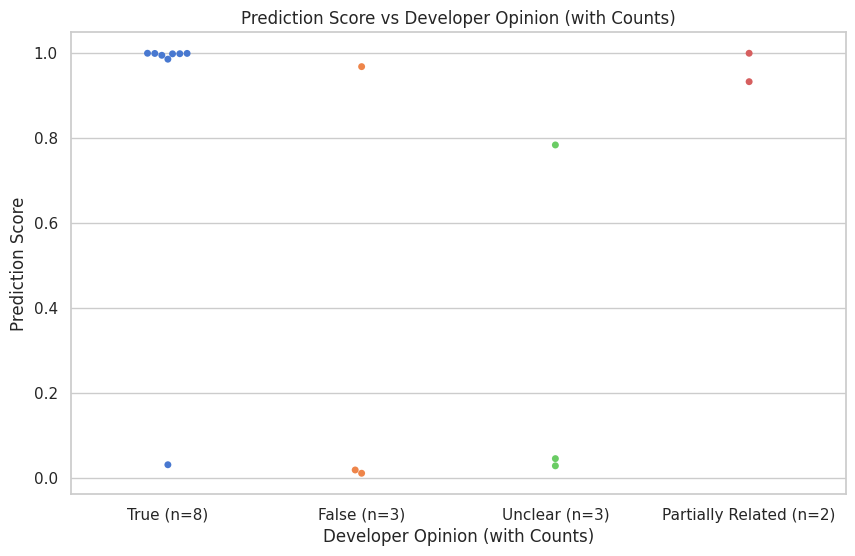

<ipython-input-41-1dcc98637956>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)


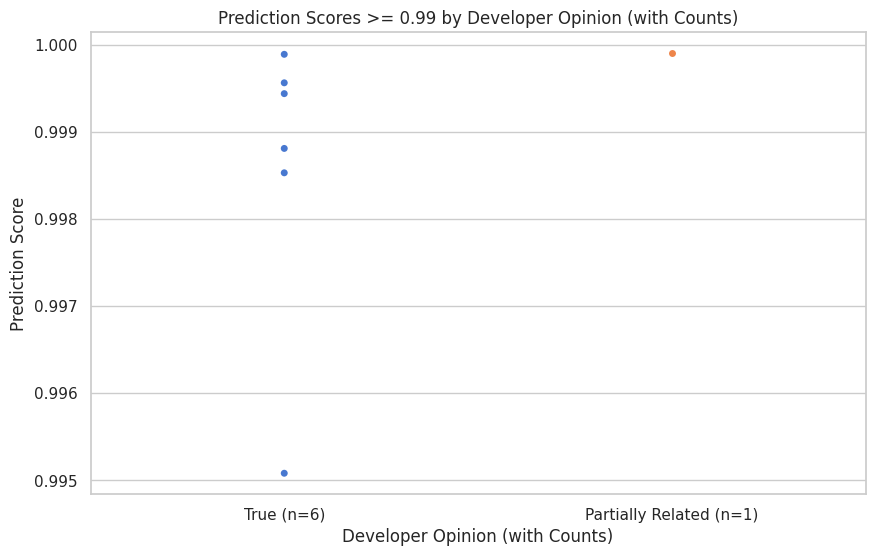

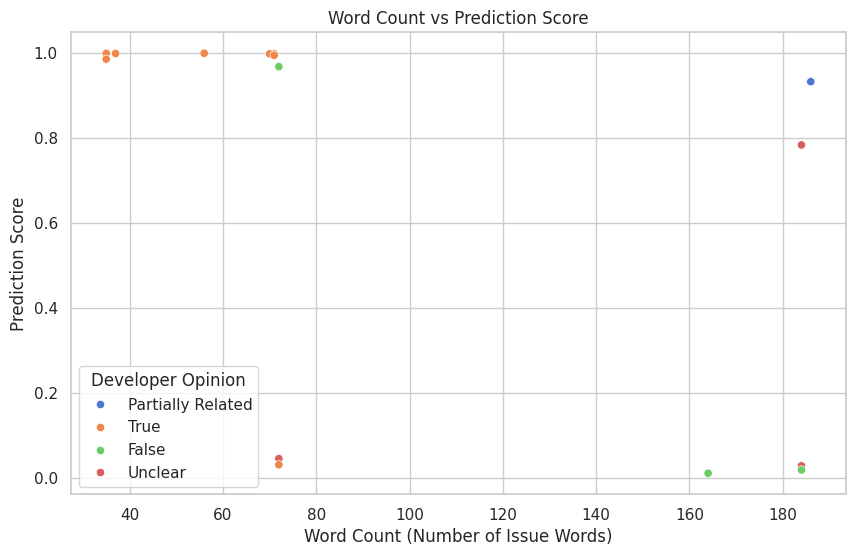

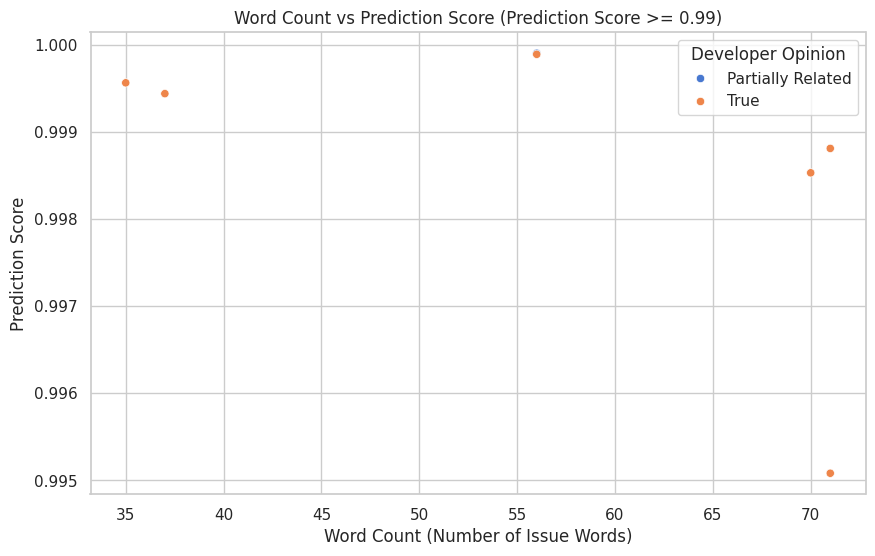

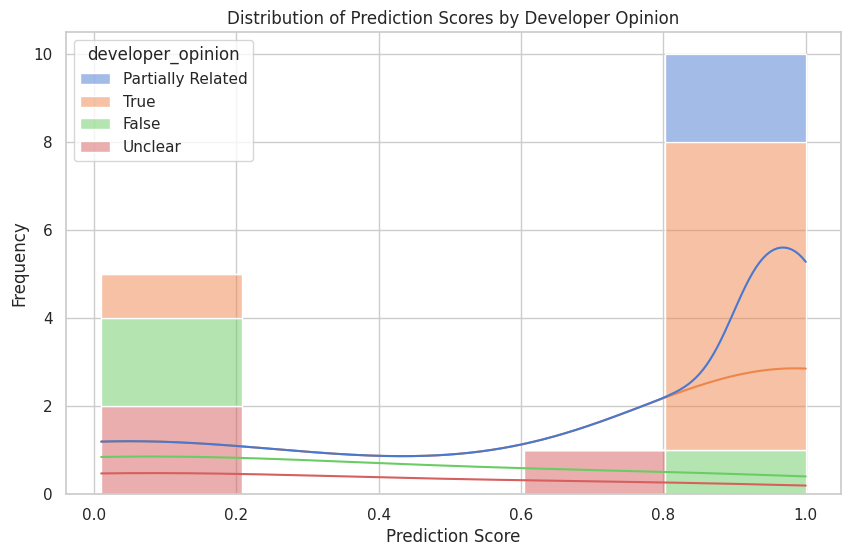

Correlation between word count and prediction score: -0.52
Summary statistics for prediction scores by developer opinion:
                    count      mean       std       min       25%       50%  \
developer_opinion                                                            
False                3.0  0.332333  0.550842  0.010452  0.014312  0.018172   
True                 8.0  0.875969  0.341658  0.030488  0.992796  0.998671   
Partially Related    2.0  0.966416  0.047360  0.932927  0.949671  0.966416   
Unclear              3.0  0.285572  0.431630  0.027922  0.036419  0.044915   

                        75%       max  
developer_opinion                      
False              0.493273  0.968374  
True               0.999471  0.999892  
Partially Related  0.983160  0.999904  
Unclear            0.414398  0.783880  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload your Excel file and replace 'your_file.xlsx' with its filename
from google.colab import files

# Load the Excel file into a DataFrame, specify the sheet name
data = pd.read_excel('result.xlsx', sheet_name='LiquidAI-supervisor')

# Ensure the data has the necessary columns
required_columns = ['number_of_issue_words', 'prediction_score', 'developer_opinion']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {required_columns}")

# Use the 'number_of_issue_words' column directly for analysis
data['word_count'] = data['number_of_issue_words']

# Define a mapping for developer opinions to numerical values (e.g., True: 1, False: 0, Unclear: -1)
opinion_mapping = {'True': 1, 'False': 0, 'Unclear': -1, 'Partially Related': 0.5}
data['opinion_mapped'] = data['developer_opinion'].map(opinion_mapping)

# Set up the plots
sns.set(style="whitegrid")
# Plot 1: Swarm plot with counts for developer opinion
plt.figure(figsize=(10, 6))
# Calculate counts for each developer opinion category
opinion_counts = data['developer_opinion'].value_counts()
# Create the swarm plot
sns.swarmplot(x='developer_opinion', y='prediction_score', data=data, palette='muted', order=opinion_counts.index)
# Update x-axis labels to include counts (ensure the order matches the plot)
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)
# Set plot titles and labels
plt.title('Prediction Score vs Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')
# Show the plot
plt.show()

# Plot 2: developer opinion vs prediction score >= 0.99
# Filter the data for entries with a prediction score of 0.99 or higher
filtered_data = data[data['prediction_score'] >= 0.99]

# Calculate counts for each developer opinion in the filtered data
opinion_counts = filtered_data['developer_opinion'].value_counts()

# Create the swarm plot to show trends
plt.figure(figsize=(10, 6))
sns.swarmplot(x='developer_opinion', y='prediction_score', data=filtered_data, palette='muted', order=opinion_counts.index)

# Update x-axis labels to include counts (ensure the order matches the plot)
plt.xticks(
    ticks=range(len(opinion_counts)),
    labels=[f"{opinion} (n={opinion_counts[opinion]})" for opinion in opinion_counts.index],
    rotation=0
)

# Set plot titles and labels
plt.title('Prediction Scores >= 0.99 by Developer Opinion (with Counts)')
plt.xlabel('Developer Opinion (with Counts)')
plt.ylabel('Prediction Score')

# Show the plot
plt.show()




# Plot 3: Word count vs Prediction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=data, palette='muted')
plt.title('Word Count vs Prediction Score')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()

# Filter data where prediction score >= 0.99
high_prediction_data = data[data['prediction_score'] >= 0.99]

# Plot 4: Word count vs Prediction Score (For Prediction Score >= 0.99)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='prediction_score', hue='developer_opinion', data=high_prediction_data, palette='muted')
plt.title('Word Count vs Prediction Score (Prediction Score >= 0.99)')
plt.xlabel('Word Count (Number of Issue Words)')
plt.ylabel('Prediction Score')
plt.legend(title='Developer Opinion')
plt.show()

# Plot 4: Distribution of Prediction Scores for True/False/Unclear
plt.figure(figsize=(10, 6))
sns.histplot(data, x='prediction_score', hue='developer_opinion', kde=True, multiple='stack', palette='muted')
plt.title('Distribution of Prediction Scores by Developer Opinion')
plt.xlabel('Prediction Score')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# Calculate correlation between word count and prediction score
correlation = data['word_count'].corr(data['prediction_score'])
print(f"Correlation between word count and prediction score: {correlation:.2f}")

# Show summary statistics for prediction scores by developer opinion
summary_stats = data.groupby('developer_opinion')['prediction_score'].describe()
print("Summary statistics for prediction scores by developer opinion:\n", summary_stats)


# New Section